In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [139]:
X,y = make_regression(n_samples=100,n_features=1, noise=10)

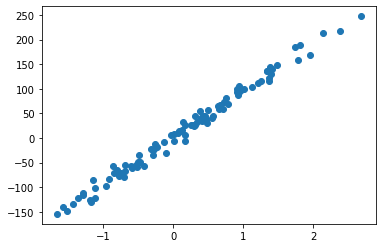

In [140]:
plt.scatter(X,y)

In [141]:
y = y.reshape(y.shape[0],1)
X = np.concatenate((X,np.ones((100,1))),axis = 1)

In [142]:
#initial theta
theta = np.random.randn(2,1)

In [143]:
theta

array([[0.15739566],
       [0.39260651]])

In [144]:
#define model function
def model(X,theta):
    return X.dot(theta)

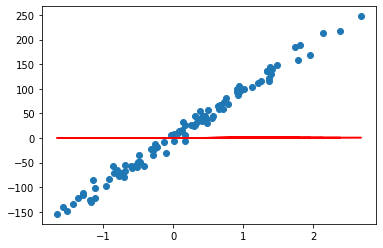

In [145]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],model(X,theta),c = 'r')

In [146]:
# model amelioration

In [147]:
#cost function

In [148]:
def cost_function(X,y,theta):
    m = len(y)
    cost = (1/2*m)*np.sum((model(X,theta) - y)**2)
    return cost

In [149]:
cost_function(X,y,theta)

42549319.397115536

In [150]:
def gradient(X,y,theta):
    m = len(y)
    grad = (1/m)*X.T.dot(model(X,theta) - y)
    return grad

In [151]:
gradient(X,y,theta)

array([[-88.71711155],
       [-17.11459204]])

In [167]:
#np.zeros((len(y),1))
np.arange(0,4)

array([0, 1, 2, 3])

In [174]:
def gradient_descent(X,y,theta,lr,n_iteration):
    cost_history = np.zeros((n_iteration,1))
    for i in range(0,n_iteration):
        theta = theta - lr * gradient(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

In [183]:
theta_final,cost_history = gradient_descent(X,y,theta,lr = 0.1,n_iteration=100)

In [184]:
theta_final

array([[94.83283402],
       [ 1.14919024]])

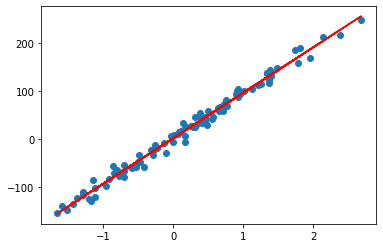

In [185]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],model(X,theta_final),c='r')

In [186]:
def model_score(X,y,theta):
    u = np.sum((model(X,theta)-y)**2)
    v = np.sum((model(X,theta)-y.mean())**2)
    mse = 1 - u/v
    return mse

In [187]:
model_score(X,y,theta_final)

0.9881548000423428

In [188]:
#cost function courbe

Text(0, 0.5, 'cout en fonction des iterations')

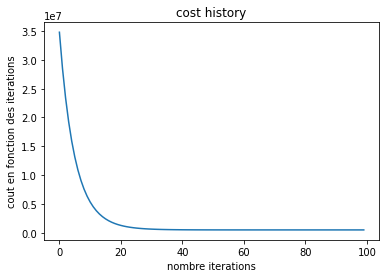

In [191]:
plt.title("cost history")
plt.plot(np.arange(100),cost_history)
plt.xlabel("nombre iterations")
plt.ylabel("cout en fonction des iterations")